In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
print('succ')

succ


In [5]:
df=pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
print('succ')

succ


In [7]:
df.shape

(11251, 15)

In [9]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [15]:
pd.isnull(df).sum

<bound method DataFrame.sum of        User_ID  Cust_name  Product_ID  Gender  Age Group    Age  \
0        False      False       False   False      False  False   
1        False      False       False   False      False  False   
2        False      False       False   False      False  False   
3        False      False       False   False      False  False   
4        False      False       False   False      False  False   
...        ...        ...         ...     ...        ...    ...   
11246    False      False       False   False      False  False   
11247    False      False       False   False      False  False   
11248    False      False       False   False      False  False   
11249    False      False       False   False      False  False   
11250    False      False       False   False      False  False   

       Marital_Status  State   Zone  Occupation  Product_Category  Orders  \
0               False  False  False       False             False   False   
1         

In [17]:
df.shape

(11251, 13)

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(11239, 13)

In [20]:
df['Amount']=df['Amount'].astype('int')

In [21]:
df['Amount'].dtypes

dtype('int32')

<h2 style="font-size:30px; bold=true;">Exploratory Data Analysis</h2>

<h2 style="font-size:20px; bold=true;">Gender</h2>

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

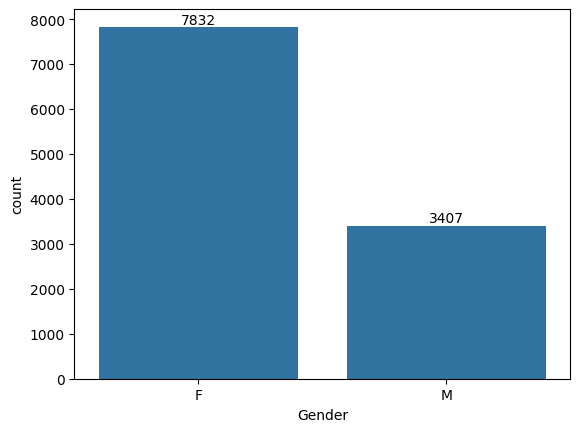

In [29]:
ax=sns.countplot(x= 'Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

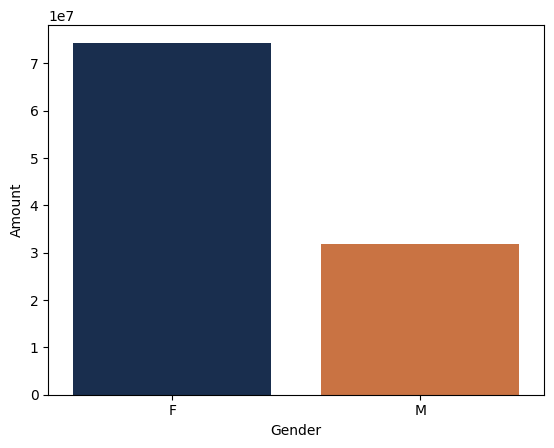

In [52]:
sales_gen=df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by="Amount", ascending=False)
custom_colors = ["#102C57", "#DF6D2D"]
sns.barplot(x='Gender', y='Amount', data=sales_gen, hue="Gender", palette=custom_colors)

<H5><I>From above graph we can see that most of the buyers are of age group between 26-35 years females</I><H5> 

<h2 style="font-size:20px; bold=true;">Age</h2>

In [42]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

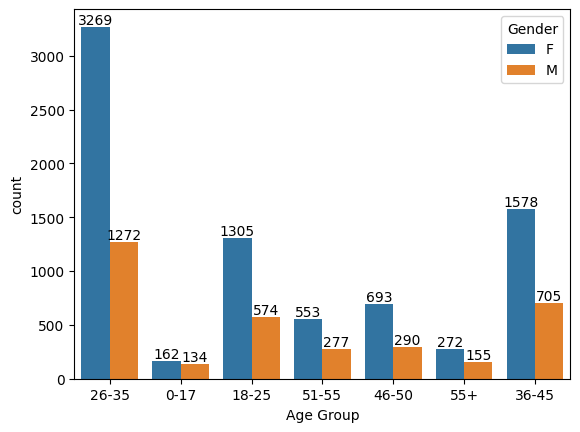

In [47]:
ax=sns.countplot(data=df, x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

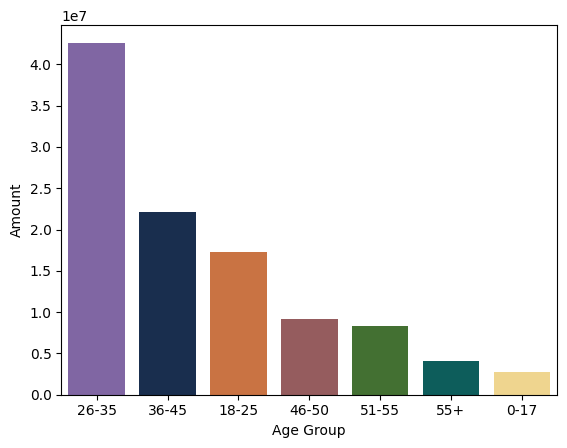

In [55]:
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
custom_colors = ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67", "#FFDC7F"]
sns.barplot(x='Age Group', y='Amount', data=sales_age, hue="Age Group", palette=custom_colors)

<h5><i> From above graph we can see that most of the buyers are of age group between 26-35 years females </i></h5>

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

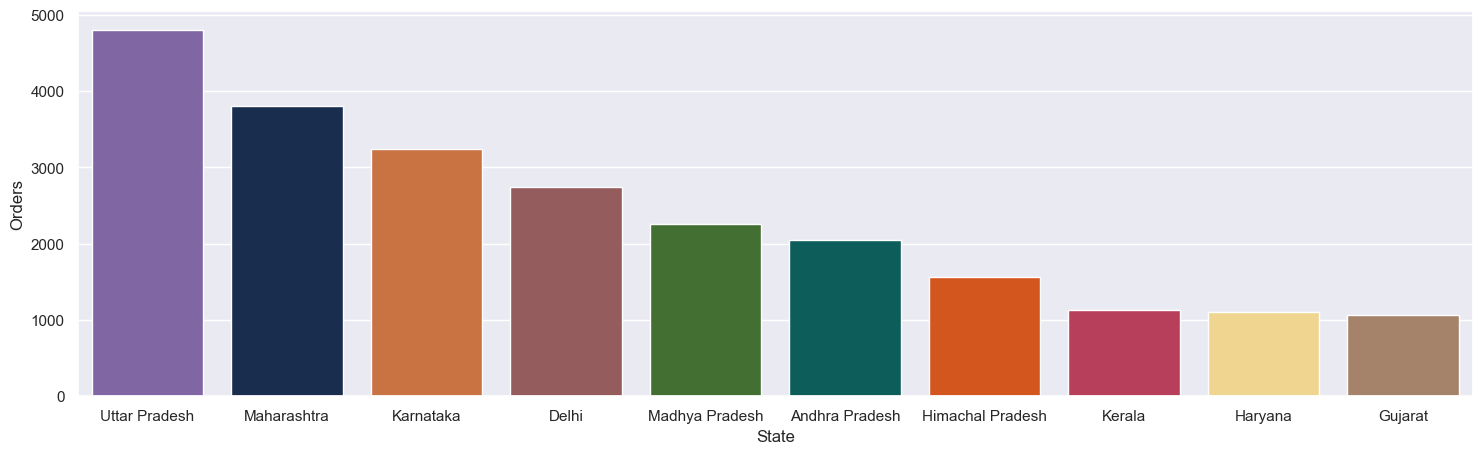

In [77]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52", "#FFDC7F", "#AF8260"]
sns.barplot(data=sales_state, x='State', y='Orders',hue="State", palette=custom_colors )

<Axes: xlabel='State', ylabel='Amount'>

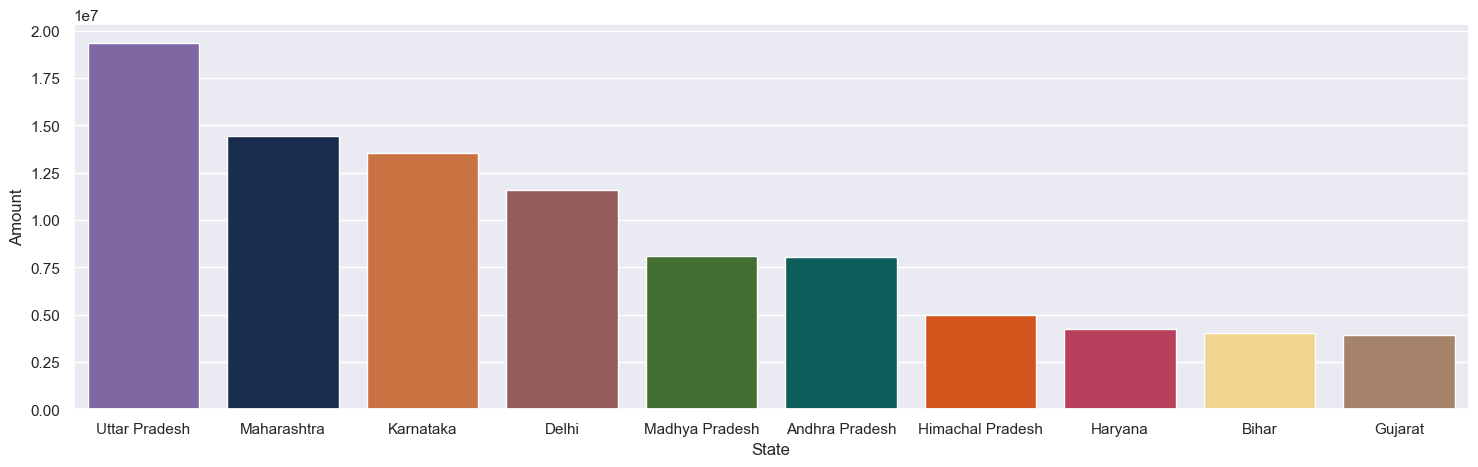

In [78]:
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52", "#FFDC7F", "#AF8260"]
sns.barplot(data=sales_state, x='State', y='Orders',hue="State", palette=custom_colors )

<h5><i> From above graph we can see that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively </i></h5>

<h2 style="font-size:20px; bold=true;">Marital Status</h2>

df.columns


In [98]:
df['Marital_Status']=df['Marital_Status'].replace({0:'Married', 1:'Unmarried'})

In [99]:
df['Marital_Status']

0          Married
1        Unmarried
2        Unmarried
3          Married
4        Unmarried
           ...    
11246    Unmarried
11247      Married
11248      Married
11249      Married
11250      Married
Name: Marital_Status, Length: 11239, dtype: object

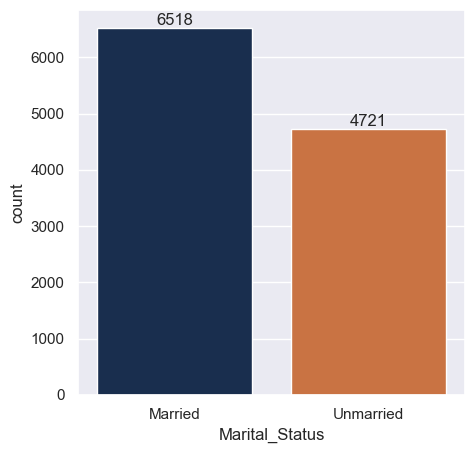

In [100]:
sns.set(rc={'figure.figsize':(5,5)})
custom_colors = ["#102C57", "#DF6D2D"]
ax=sns.countplot(data=df, x="Marital_Status",hue="Marital_Status",palette=custom_colors)
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

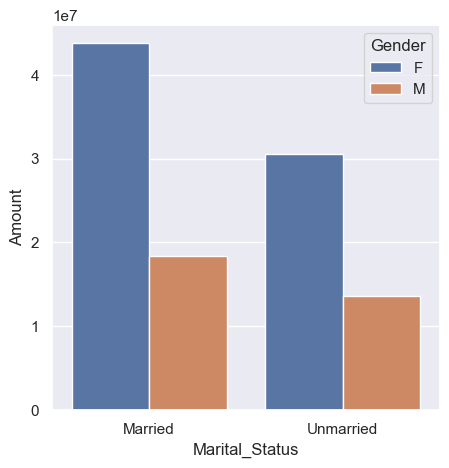

In [103]:
sales_maritalstatus=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sales_maritalstatus, x='Marital_Status', y='Amount', hue='Gender')

<h5><i> From above graph we can see that most of the buyers are married(women) and have high purchasing power  </i></h5>

<h2 style="font-size:20px; bold=true;">Occupation</h2>

In [106]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

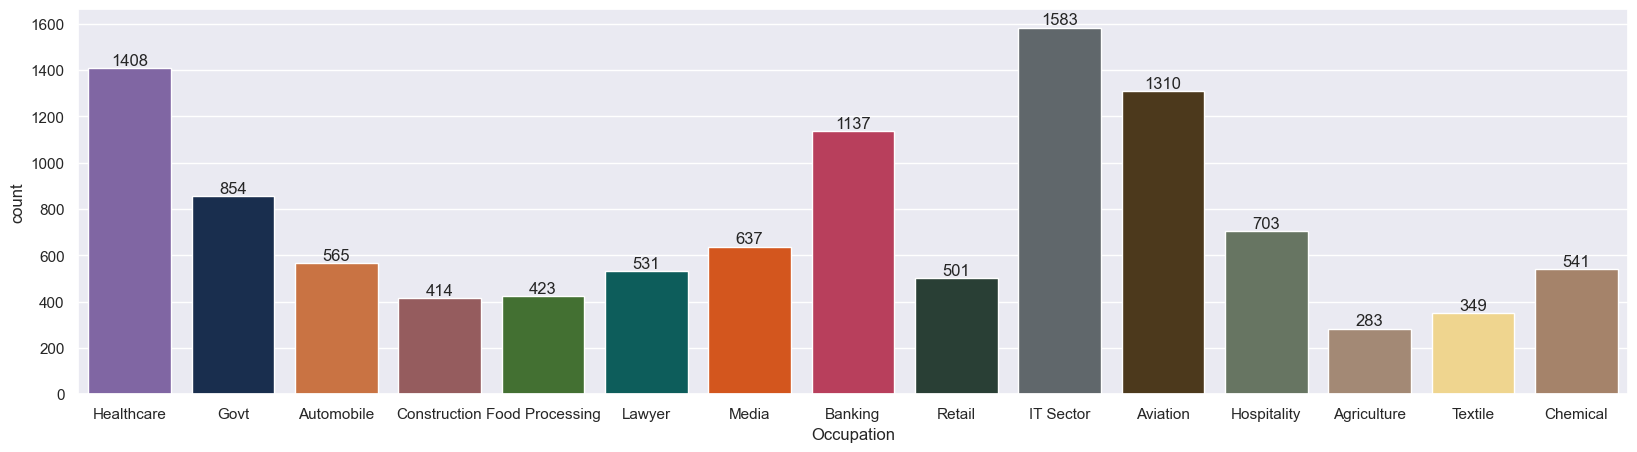

In [116]:
sns.set(rc={'figure.figsize':(20,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52","#254336","#5E686D","#543A14","#66785F","#AB886D","#FFDC7F", "#AF8260",]
ax=sns.countplot(x='Occupation', data=df,hue='Occupation', palette=custom_colors)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Orders'>

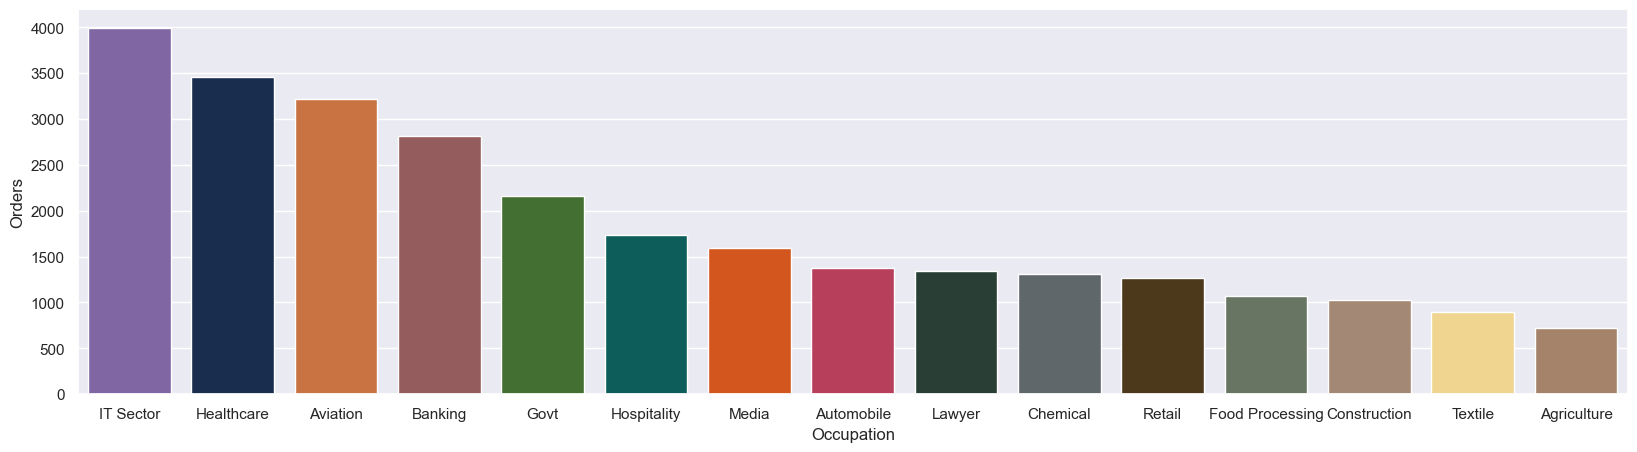

In [123]:
sns.set(rc={'figure.figsize':(20,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52","#254336","#5E686D","#543A14","#66785F","#AB886D","#FFDC7F", "#AF8260",]
sales_occupation=df.groupby(['Occupation'], as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False)
sns.barplot(x="Occupation", y="Orders", data=sales_occupation, palette=custom_colors, hue="Occupation")

<Axes: xlabel='Occupation', ylabel='Amount'>

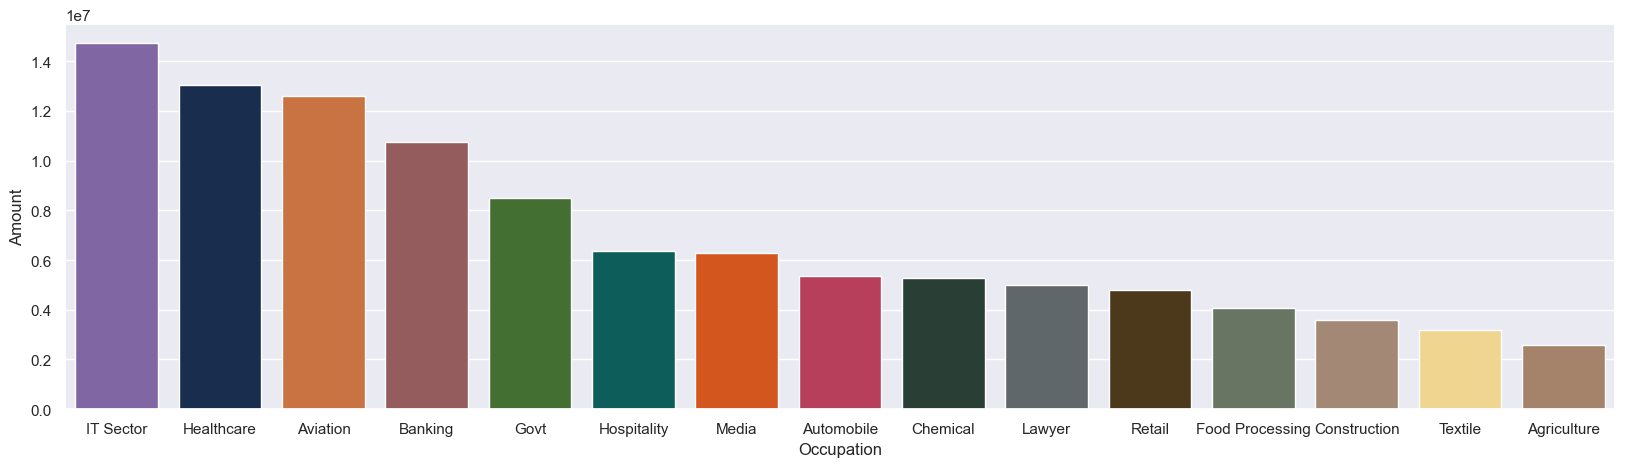

In [124]:
sns.set(rc={'figure.figsize':(20,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52","#254336","#5E686D","#543A14","#66785F","#AB886D","#FFDC7F", "#AF8260",]
sales_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.barplot(x="Occupation", y="Amount", data=sales_occupation, palette=custom_colors, hue="Occupation")

<h5><i> From above graph we can see that most of the buyers are working in IT, Aviation and Healthcare</i></h5>

<h2 style="font-size:20px; bold=true;">Product Category</h2>

In [126]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

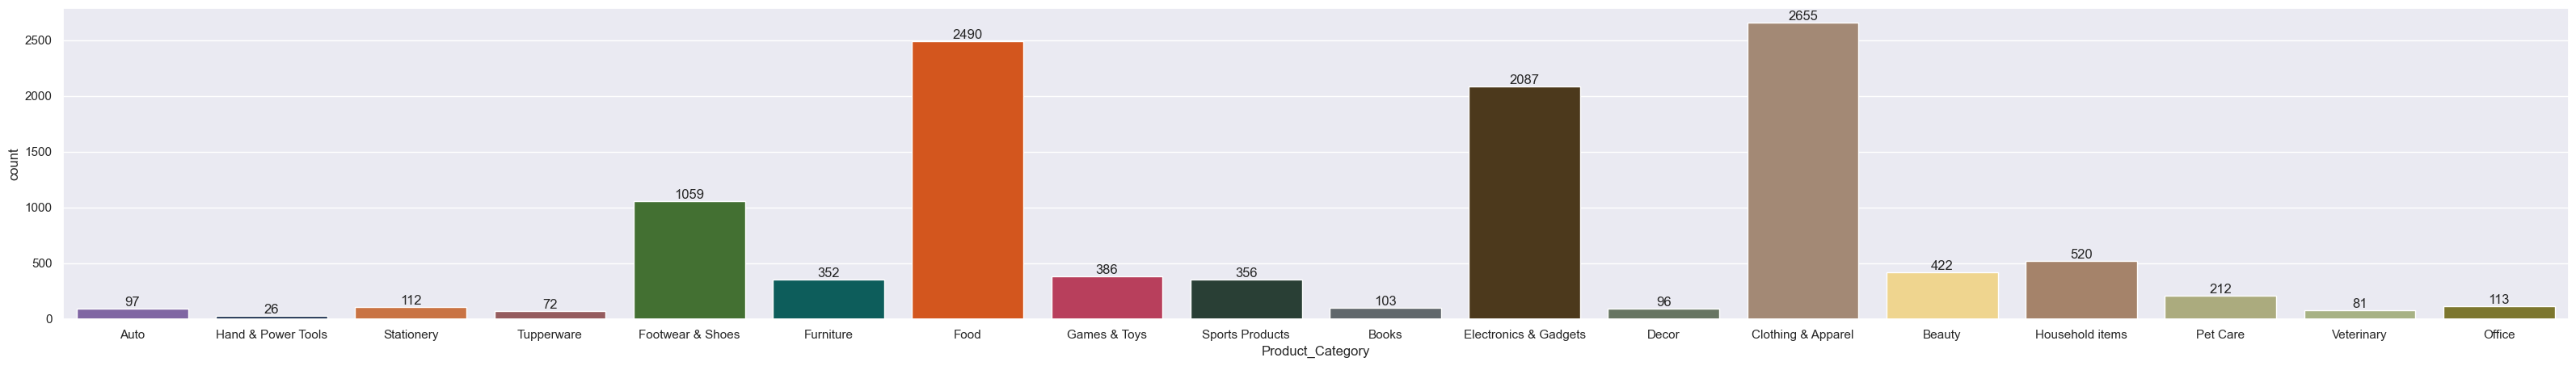

In [144]:
sns.set(rc={'figure.figsize':(40,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52","#254336","#5E686D","#543A14","#66785F","#AB886D","#FFDC7F", "#AF8260","#B2B377", "#ABBA7C","#898121"]
ax=sns.countplot(x='Product_Category', data=df,hue='Product_Category',palette=custom_colors)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

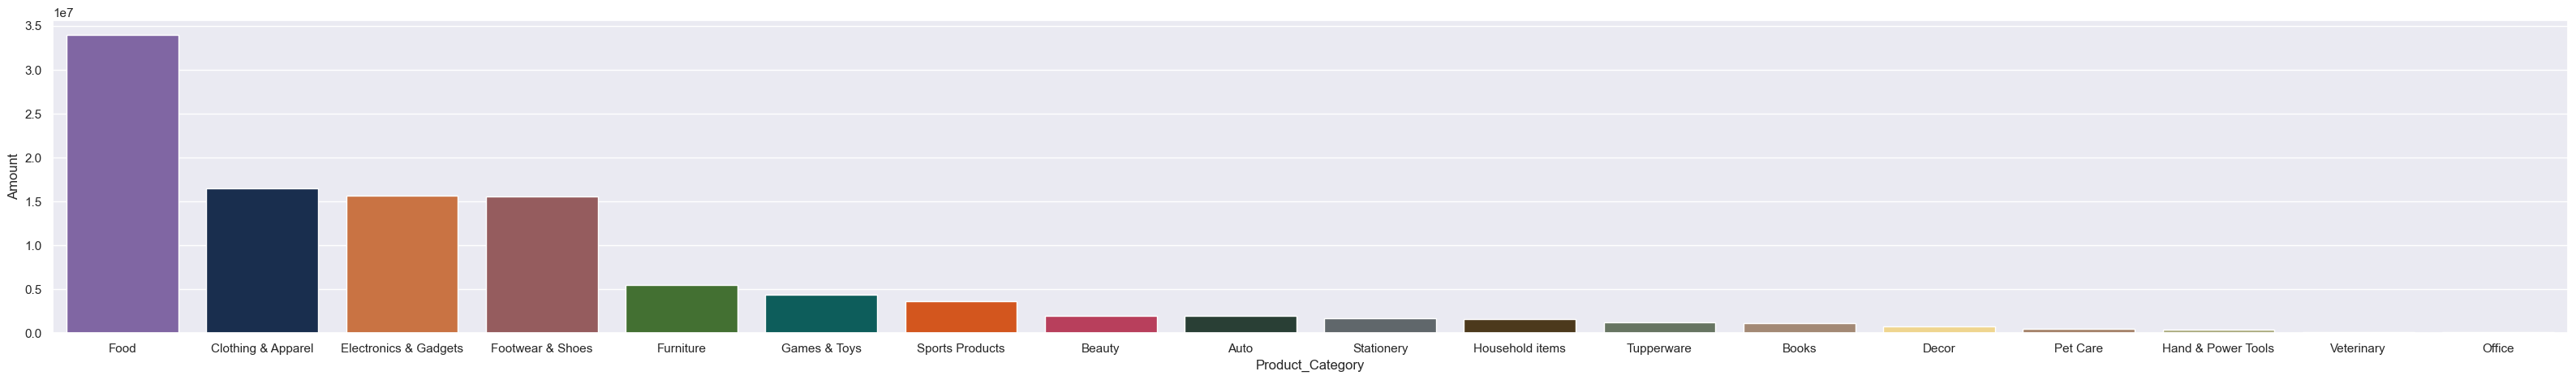

In [140]:
sns.set(rc={'figure.figsize':(40,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52","#254336","#5E686D","#543A14","#66785F","#AB886D","#FFDC7F", "#AF8260","#B2B377", "#ABBA7C","#898121"]
sales_product=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=False)
sns.barplot(x='Product_Category', y='Amount', data=sales_product, hue='Product_Category', palette=custom_colors)

<Axes: xlabel='Product_Category', ylabel='Orders'>

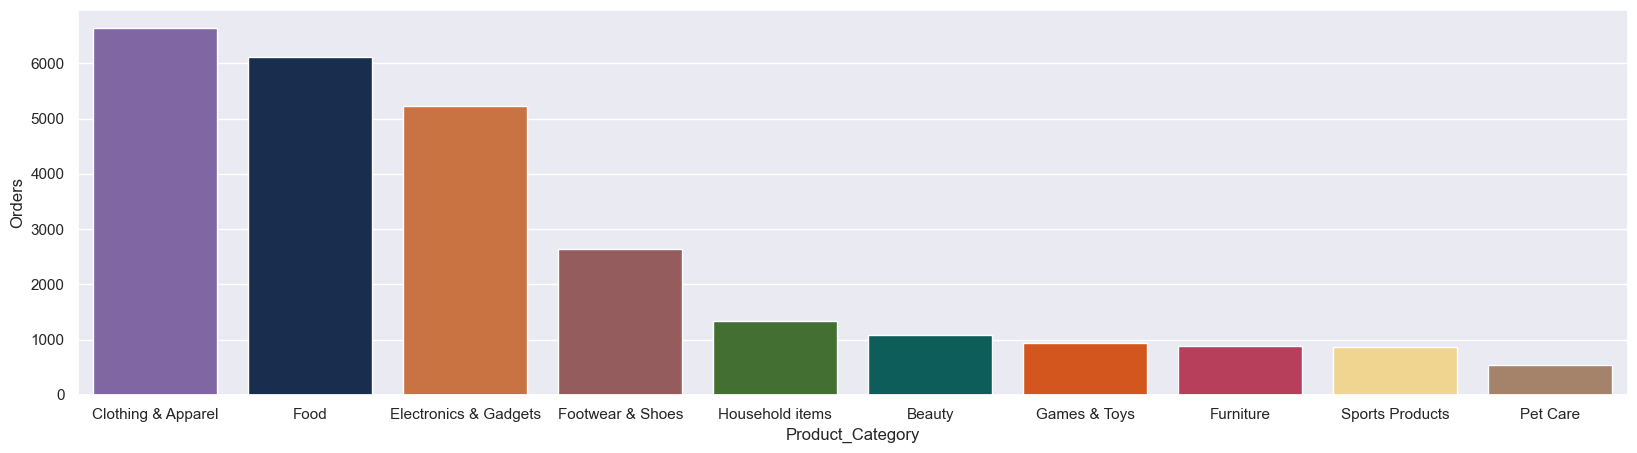

In [146]:
sns.set(rc={'figure.figsize':(20,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52", "#FFDC7F", "#AF8260"]
sales_product=df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by=['Orders'], ascending=False).head(10)
sns.barplot(x='Product_Category', y='Orders', data=sales_product, hue='Product_Category', palette=custom_colors)

<h5><i> From above graph we can see that most of the sold products are from Food, Footwear and Electronics Category</i></h5>

<Axes: xlabel='Product_ID', ylabel='Orders'>

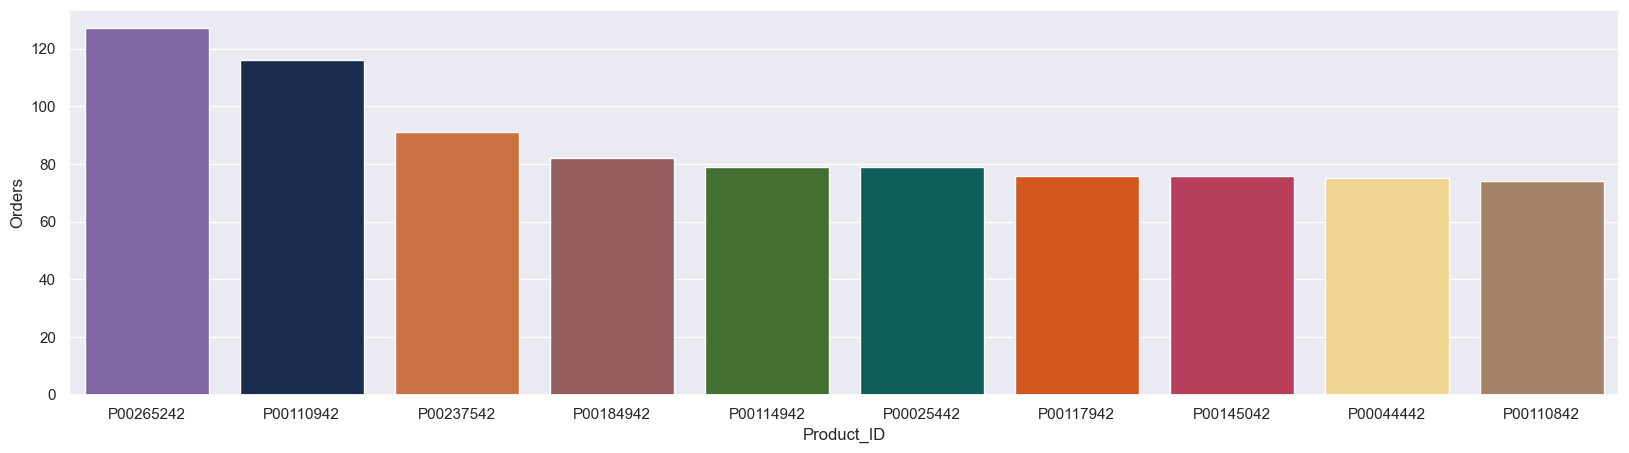

In [147]:
sns.set(rc={'figure.figsize':(20,5)})
custom_colors= ["#7E5CAD","#102C57", "#DF6D2D","#9F5255","#3E7B27", "#006A67","#F14A00","#CC2B52", "#FFDC7F", "#AF8260"]
sales_product=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by=['Orders'], ascending=False).head(10)
sns.barplot(x='Product_ID', y='Orders', data=sales_product, hue='Product_ID', palette=custom_colors)

<h2 style="font-size:40px; bold=true;">Conclusion</h2>

<h5><i> Married Women from age 26-35 from UP, Maharashtra and Karnataka working in IT, Healthcare, and Aviation are more likely to buy products from Food Clothing and Electronics category</i></h5>